# **7-2 상태 변화와 벨만 방정식**

Grid World 환경

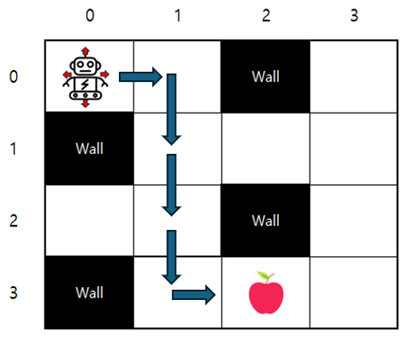

📌[실습 07-09] 그리드-월드 환경 정의하기

In [ ]:
## 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 환경 설정
그리드_수=[4, 4]
목표_셀=(3, 2)
차단_셀=[(2, 2), (3,0), (1,0), (0,2)]
출발_셀=(0, 0)
행동_이름=['up', 'down', 'left', 'right']
n_actions=4

📌[실습 07-10] 다음 상태를 결정하는 함수 정의하기

In [ ]:
# 다음 상태 계산 함수
def 상태_변화(상태, 행동):
    x, y=상태
    if 행동==0:   # up
        다음_상태=(max(x - 1, 0), y)
    elif 행동==1: # down
        다음_상태=(min(x + 1, 그리드_수[0] - 1), y)
    elif 행동==2: # left
        다음_상태=(x, max(y - 1, 0))
    elif 행동==3: # right
        다음_상태=(x, min(y + 1, 그리드_수[1] - 1))

    # 차단_셀에 부딪히면 움직이지 않음
    if 다음_상태 in 차단_셀:    # in 은 포함되면 이란 뜻
        다음_상태=상태
    return 다음_상태


📌[실습 07-011] 상태 변화 확인 하기

In [ ]:
print(상태_변화((2, 2), 2))     # left 정상 이동
print(상태_변화((2, 2), 0))     # up 정상 이동
print(상태_변화((3, 2), 1))     # down -> 아래쪽으로 탈출 시도
print(상태_변화((1, 2), 1))     # 벽에 부딪힘
print(상태_변화((1, 3), 3))     # right -> 오른쪽으로 탈출 시도


(2, 1)
(1, 2)
(3, 2)
(1, 2)
(1, 3)


📌[실습 07-12] 보상 함수 정의하기

In [ ]:
def 보상(상태):
    return 1 if 상태==목표_셀 else -0.1

📌[실습 07-13] 보상 함수 호출하기

In [ ]:
print(보상((2, 2)))
print(보상((3, 2)))

-0.1
1


📌[실습 07-14] 하이퍼 파라미터 설정하기

In [ ]:
# 하이퍼 파라미터 설정
alpha=0.1     # 학습률
gamma=0.9     # 할인율
e=1           # 초기 탐험 확률
e_decay=0.995 # 감소비율
e_min=0.1     # 최소 e

📌[실습 07-15] Q값 없이 무작위 행동으로 탐험하기

In [ ]:
n_episodes=1         # 에피소드 수
for ep in range(n_episodes):   # ep는 반복문 인덱스
    상태=출발_셀    # (0, 0)에서 출발
    종료=False
    while not 종료:                       # 종료 조건이 True가 될때까지 반복
        행동=random.randint(0, 3)         # 0~3 중 무작위로 행동 선택
        다음_상태=상태_변화(상태, 행동)   # 다음 상태 결정
        종료=(다음_상태 == 목표_셀)     # 다음_상태가 목표_셀이면 종료

        # 아직 Q값 없음
        상태=다음_상태           # 상태 업데이트
        print(상태, end="->")      # 상태   출력


(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 1)->(0, 1)->(0, 1)->(0, 1)->(1, 1)->(2, 1)->(1, 1)->(2, 1)->(2, 1)->(3, 1)->(3, 2)->

📌[실습 07-16] 랜덤 Q값 만들기

In [ ]:
import numpy as np
np.random.seed(42); random.seed(42)  # 랜덤 시드 고정 (확실한 재현성을 위해 2개 고정)

# Q-배열 생성 및 난수로 채우기
Q=np.random.rand(4, 4, 4)
Q=np.round(Q, 3)  # 소수점 지정

# 배열 출력
print("Q-배열의 (높이, 넓이, 깊이)=", Q.shape); print()
Q


Q-배열의 (높이, 넓이, 깊이)= (4, 4, 4)



array([[[0.375, 0.951, 0.732, 0.599],
        [0.156, 0.156, 0.058, 0.866],
        [0.601, 0.708, 0.021, 0.97 ],
        [0.832, 0.212, 0.182, 0.183]],

       [[0.304, 0.525, 0.432, 0.291],
        [0.612, 0.139, 0.292, 0.366],
        [0.456, 0.785, 0.2  , 0.514],
        [0.592, 0.046, 0.608, 0.171]],

       [[0.065, 0.949, 0.966, 0.808],
        [0.305, 0.098, 0.684, 0.44 ],
        [0.122, 0.495, 0.034, 0.909],
        [0.259, 0.663, 0.312, 0.52 ]],

       [[0.547, 0.185, 0.97 , 0.775],
        [0.939, 0.895, 0.598, 0.922],
        [0.088, 0.196, 0.045, 0.325],
        [0.389, 0.271, 0.829, 0.357]]])

📌[실습 07-17] Q값에 따른 최적 행동 확인하기

In [ ]:
print("상태가 (2, 1)일때 Q값=", Q[2, 1, :])
print("이 상태에서 Q가 알려주는 최적 행동은 ", 행동_이름[ np.argmax(Q[2, 1,:]) ])

상태가 (2, 1)일때 Q값 = [0.305 0.098 0.684 0.44 ]
이 상태에서 Q가 알려주는 최적 행동은  left


📌[실습 07-18] Q값 업데이트하기 — 즉각적인 보상만 반영할 경우

In [ ]:
np.random.seed(42); random.seed(42)                   # 랜덤 시드 고정 (확실한 재현성을 위해 2개 고정)

Q=np.zeros((그리드_수[0], 그리드_수[1], n_actions))   # Q를 초기화: 모든 값을 0으로 시작
n_episodes=1   # 학습 횟수
for ep in range(n_episodes):
    상태=출발_셀                                  # (0, 0)에서 출발
    종료=False
    while not 종료:                               # 종료될 때까지 반복
        행동=np.argmax(Q[상태[0], 상태[1], :])    # 현재 상태에서 Q가 가장 큰 행동 선택
        다음_상태=상태_변화(상태, 행동)           # 다음 상태 결정
        종료=(다음_상태 == 목표_셀)               # 다음_상태가 목표_셀이면 종료
        reward=보상(다음_상태)               # 다음 상태에서의 보상 계산
        # Q값 업데이트
        Q[상태[0], 상태[1], 행동]=(1-alpha) * Q[상태[0], 상태[1], 행동] + alpha * reward
        상태=다음_상태
        print(상태, end="->")   # 상태 출력



(0, 0)->(0, 0)->(0, 0)->(0, 1)->(0, 1)->(1, 1)->(0, 1)->(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 1)->(0, 1)->(0, 1)->(1, 1)->(2, 1)->(1, 1)->(1, 1)->(1, 2)->(1, 2)->(1, 2)->(1, 1)->(0, 1)->(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 1)->(0, 1)->(0, 1)->(1, 1)->(2, 1)->(3, 1)->(2, 1)->(2, 0)->(2, 0)->(2, 0)->(2, 0)->(2, 1)->(2, 1)->(1, 1)->(1, 1)->(1, 2)->(1, 3)->(0, 3)->(0, 3)->(1, 3)->(2, 3)->(1, 3)->(1, 2)->(1, 2)->(1, 2)->(1, 1)->(0, 1)->(0, 0)->(0, 0)->(0, 0)->(0, 0)->(0, 1)->(0, 1)->(0, 1)->(1, 1)->(2, 1)->(3, 1)->(3, 1)->(3, 1)->(3, 2)->

In [ ]:
Q

array([[[-0.03439, -0.03439, -0.03439, -0.03439],
        [-0.03439, -0.03439, -0.0271 , -0.0271 ],
        [ 0.     ,  0.     ,  0.     ,  0.     ],
        [-0.01   , -0.01   ,  0.     ,  0.     ]],

       [[ 0.     ,  0.     ,  0.     ,  0.     ],
        [-0.0271 , -0.0271 , -0.019  , -0.019  ],
        [-0.019  , -0.019  , -0.019  , -0.01   ],
        [-0.01   , -0.01   , -0.01   ,  0.     ]],

       [[-0.01   , -0.01   , -0.01   , -0.01   ],
        [-0.019  , -0.019  , -0.01   , -0.01   ],
        [ 0.     ,  0.     ,  0.     ,  0.     ],
        [-0.01   ,  0.     ,  0.     ,  0.     ]],

       [[ 0.     ,  0.     ,  0.     ,  0.     ],
        [-0.01   , -0.01   , -0.01   ,  0.1    ],
        [ 0.     ,  0.     ,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.     ,  0.     ]]])

In [ ]:
Q[3, 1,]

array([-0.01, -0.01, -0.01,  0.1 ])

## **장기적인 보상의 고려(벨만 방정식)**

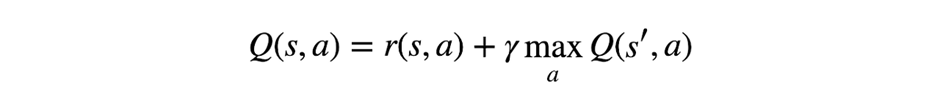

📌[실습 07-19] Q값 업데이트하기 — 장기적인 보상까지 반영할 경우

In [ ]:
np.random.seed(42); random.seed(42)   # 랜덤 시드 고정 (확실한 재현성을 위해 2개 고정 추천)

Q=np.zeros((그리드_수[0], 그리드_수[1], n_actions))   # Q-테이블 초기화
# 하이퍼 파라미터 설정
n_episodes=500                        # 에피소드의 수
e=1.0 ; e_decay=0.99; e_min=0.1       # 탐험 비율 설정
alpha=0.1                             # 학습률
gamma=0.9                             # 할인율

for ep in range(n_episodes):
    상태=출발_셀
    종료=False

    while not 종료:
        if random.uniform(0, 1) < e:
            행동=random.randint(0, 3)  # 무작위 행동
        else:
            행동=np.argmax(Q[상태[0], 상태[1], :])  # 최적 행동
        다음_상태=상태_변화(상태, 행동)
        종료=(다음_상태 == 목표_셀)  # 다음_상태가 목표_셀이면 종료

        reward=보상(다음_상태)
        # Q값 업데이트
        if 종료:
          Q[상태[0], 상태[1], 행동]=(1-alpha)*Q[상태[0], 상태[1], 행동] + alpha*(reward)
        else:
          Q[상태[0], 상태[1], 행동]=(1-alpha)*Q[상태[0], 상태[1], 행동] + alpha*(reward + gamma*np.max(Q[다음_상태[0], 다음_상태[1], :]))
        상태=다음_상태

    e=max(e*e_decay, e_min)  # 탐험 비율 감소
Q                            # 학습된 Q-테이블을 출력

array([[[ 0.15699388,  0.15307131,  0.13653016,  0.3122    ],
        [ 0.30375677,  0.458     ,  0.15876293,  0.29618285],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [-0.14967778, -0.14002288, -0.16348461, -0.15539692]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.30497457,  0.62      ,  0.43941185,  0.2509664 ],
        [ 0.00168965, -0.01124163,  0.43952161, -0.13906734],
        [-0.15341568,  0.01639279, -0.09665583, -0.14517034]],

       [[-0.04471939,  0.0144378 ,  0.0033816 ,  0.59251699],
        [ 0.40429172,  0.8       ,  0.35730605,  0.58795562],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [-0.12736883,  0.28436701, -0.07384965, -0.06986294]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.59388003,  0.78088659,  0.77760373,  1.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [-0.03229724,  0.11225157,  0.74581342,  0.11970344]]])

📌[실습 07-20] 최종 학습된 Q값으로 최적 경로 확인하기

In [ ]:
print("최적 경로")
상태=출발_셀
종료=False
while not 종료:
        행동=np.argmax(Q[상태[0], 상태[1], ])
        다음_상태=상태_변화(상태, 행동)
        종료=(다음_상태==목표_셀)
        상태=다음_상태
        print(상태, end="-> ")
print("목표 도달")

최적 경로
(0, 1)-> (1, 1)-> (2, 1)-> (3, 1)-> (3, 2)-> 목표 도달
